# Random Forest 2

Let's train a random forest on the data from 2020-2022 and test it on the data from 2023.

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Data Preparation

In [24]:
# Load the data
df_20 = pd.read_csv('../../results/df_agg_hourly_2020.csv')
df_21 = pd.read_csv('../../results/df_agg_hourly_2021.csv')
df_22 = pd.read_csv('../../results/df_agg_hourly_2022.csv')
df_23 = pd.read_csv('../../results/df_agg_hourly_2023.csv')

# Concatenate the data
df_train = pd.concat([df_20, df_21, df_22])
df_test = df_23

# Make the bezeichnung column as categorical
df_train['bezeichnung'] = df_train['bezeichnung'].astype('category')
df_test['bezeichnung'] = df_test['bezeichnung'].astype('category')

# Extract hour from Time and month from Date
df_train['hour'] = pd.to_datetime(df_train['Time']).dt.hour
df_train['month'] = pd.to_datetime(df_train['Date']).dt.month
df_test['hour'] = pd.to_datetime(df_test['Time']).dt.hour
df_test['month'] = pd.to_datetime(df_test['Date']).dt.month

# Include the day of the week
df_train['day_of_week'] = pd.to_datetime(df_train['Date']).dt.dayofweek
df_test['day_of_week'] = pd.to_datetime(df_test['Date']).dt.dayofweek

# What are the columns?
print(df_train.dtypes)

Standort            int64
Date               object
Time               object
Datetime           object
Hr [%Hr]          float64
RainDur [min]     float64
StrGlo [W/m2]     float64
T [°C]            float64
WD [°]            float64
WVs [m/s]         float64
WVv [m/s]         float64
p [hPa]           float64
Year                int64
AnzBestWir          int64
bezeichnung      category
bike_tot          float64
ped_tot           float64
hour                int32
month               int32
day_of_week         int32
dtype: object


/var/folders/m_/kjymw9sd0yn2wk8yjj853n_c0000gn/T/ipykernel_91610/882771652.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_train['hour'] = pd.to_datetime(df_train['Time']).dt.hour
/var/folders/m_/kjymw9sd0yn2wk8yjj853n_c0000gn/T/ipykernel_91610/882771652.py:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_test['hour'] = pd.to_datetime(df_test['Time']).dt.hour


In [25]:
# Keep only the relevant columns
df_train_relevant = df_train.drop(['Date', 'Time', 'Datetime', 'WVs [m/s]', 'StrGlo [W/m2]', 'bezeichnung', 'ped_tot'], axis=1)
df_test_relevant = df_test.drop(['Date', 'Time', 'Datetime', 'WVs [m/s]', 'StrGlo [W/m2]', 'bezeichnung', 'ped_tot'], axis=1)

# Print the shapes
print(df_train_relevant.shape)
print(df_test_relevant.shape)

(508575, 13)
(220908, 13)


In [26]:
# Split the dataset into features and target
X_train = df_train_relevant.drop(['bike_tot'], axis=1)
y_train = df_train_relevant['bike_tot']
X_test = df_test_relevant.drop(['bike_tot'], axis=1)
y_test = df_test_relevant['bike_tot']

In [27]:
# Fit the random forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
RF = model.fit(X_train, y_train)

<Axes: >

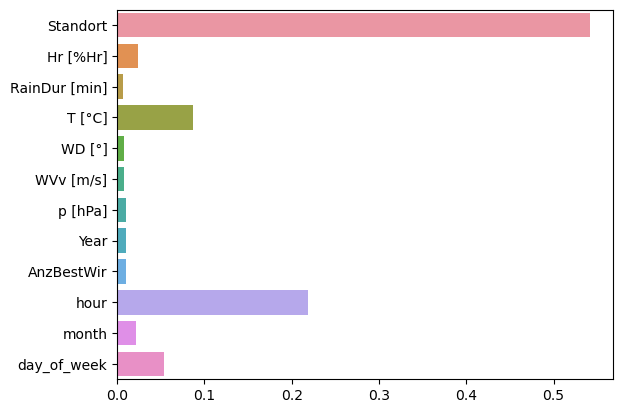

In [28]:
# Plot the importance of the features
importances = RF.feature_importances_
sns.barplot(x=importances, y=X_train.columns)

In [29]:
# Predict on test data
y_pred = RF.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'RMSE: {rmse}')
print(f'R2: {r2}')

RMSE: 43.30875466169655
R2: 0.6362665335344111


/Users/damian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/damian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/damian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/damian/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

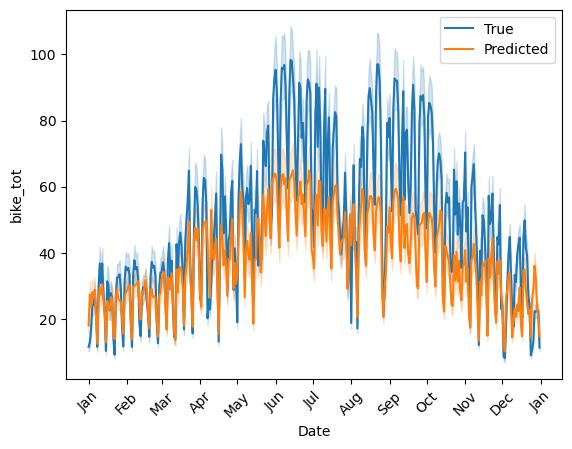

In [31]:
# Plot the predictions and true values
sns.lineplot(x=pd.to_datetime(df_test['Date']), y=y_test, label='True')
sns.lineplot(x=pd.to_datetime(df_test['Date']), y=y_pred, label='Predicted')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))
plt.xticks(rotation=45)
plt.show()